In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
data=pd.read_csv('/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Regression/Simple_Linear_Regression/SimpleLinearRegression.csv')
data

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [31]:
print(data.isnull().sum())

cgpa       0
package    0
dtype: int64


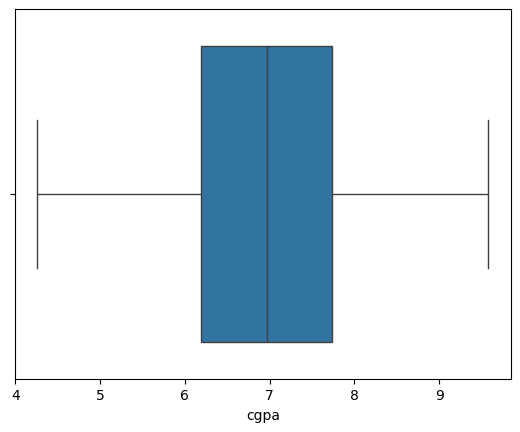

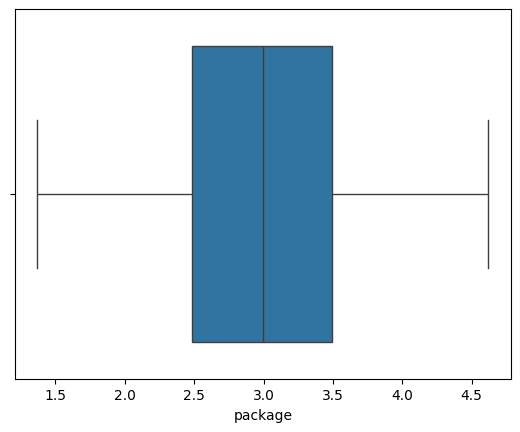

In [32]:
for i in data:
    sns.boxplot(x=i,data=data)
    plt.show()

In [33]:
x=data.iloc[:,:-1]
y=data['package']



In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
dtr=DecisionTreeRegressor(criterion='squared_error',splitter='random',max_depth=5,random_state=51)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=51, splitter='random')

In [47]:
dtr.score(x_train,y_train)*100,dtr.score(x_test,y_test)*100

(79.72377522329069, 75.8879213269115)

In [48]:
df={"criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] ,
    "splitter": ['best', 'random'],
    "max_depth": [i for i in range(2,20)],
    "random_state": [i for i in range(0,101)]}

In [42]:
gs=GridSearchCV(DecisionTreeRegressor(),param_grid=df)
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'splitter': ['best', 'random']})

In [53]:
4*2*18*100

14400

In [43]:
gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'random_state': 51,
 'splitter': 'random'}

In [49]:
gs.best_score_

np.float64(0.7495773134656158)

In [50]:
rd=RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=df,n_iter=20)
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...],
                                        'splitter': ['best', 'random']})

In [51]:
rd.best_params_

{'splitter': 'random',
 'random_state': 86,
 'max_depth': 5,
 'criterion': 'poisson'}

In [52]:
rd.best_score_

np.float64(0.7236011073618634)